### 집계함수

# Correlation Analysis

## Packages

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
import io

myfile = files.upload()
data = pd.read_csv(io.BytesIO(myfile['data.csv']) )

Saving data.csv to data.csv


In [ ]:
data

,Month,Electricity Usage,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
0,2002-01-01,24352.83118,6.0,-2.9,64.0,64,0,1314.4,55330,282.60,538.4580,1227.50,597.91,509.85,34986570.0,784741.3,20.3,7.7,48229948
1,2002-02-01,21099.63500,8.8,-3.1,6.7,56,0,1323.8,525460,283.00,538.4580,1225.43,600.11,509.60,34986570.0,784741.3,20.4,7.7,48229948
2,2002-03-01,23568.18835,14.3,1.8,53.1,56,0,1325.9,29620,303.90,538.4580,1233.62,609.21,512.47,34986570.0,784741.3,20.5,7.7,48229948
3,2002-04-01,22199.24014,19.6,7.2,153.7,58,0,1294.0,452940,304.00,538.4580,1265.08,652.75,536.59,34986570.0,784741.3,20.4,7.7,48229948
4,2002-05-01,22960.52245,22.5,11.7,113.6,67,0,1226.3,74240,314.20,538.4580,1293.46,681.37,548.88,34986570.0,784741.3,20.4,7.7,48229948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022-12-01,52889.45221,3.8,-6.0,15.2,62,0,1264.5,85550,1798.00,682.3210,1563.68,1783.21,1552.55,49564650.0,2150575.8,20.5,2.6,51439038
252,2023-01-01,51651.56160,12.5,-17.3,47.9,63,0,1231.9,1020000,1847.20,739.8397,1562.93,1675.37,1495.25,51226248.8,2206263.0,20.6,1.6,51430018
253,2023-02-01,45739.50828,12.4,-5.3,1.0,59,0,1322.6,111600,1959.70,739.8397,1578.49,1606.41,1464.42,51226248.8,2206263.0,20.8,1.6,51421479
254,2023-03-01,44077.47262,25.1,-1.9,10.5,51,0,1301.9,5220000,1834.00,739.8397,1592.25,1539.72,1426.45,51226248.8,2206263.0,20.9,1.6,51414281


## Dataset

In [ ]:
data.dtypes


Month                                        object
Electricity Usage                           float64
Average Maximum Temperature                 float64
Average Minimum Temperature                 float64
Average Rainfall                            float64
Average Humidity                              int64
Tropical Night                                int64
Exchage Rate                                float64
Gold Trading Volume(g)                        int64
Gold Price                                  float64
Total Greenhouse Gase Emissions in Korea    float64
The Price of Gasoline                       float64
Diesel Price                                float64
Indoor Kerosene Prices                      float64
Global Greenhouse Gas Emissions             float64
Gross Domestic Product (KRW 1 billion)      float64
Global Average Sea-level Temperature(℃)     float64
A Rate of Economic Growth                   float64
The Number of People                          int64
dtype: objec

In [ ]:
data

,Month,Electricity Usage,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
0,2002-01-01,24352.83118,6.0,-2.9,64.0,64,0,1314.4,55330,282.60,538.4580,1227.50,597.91,509.85,34986570.0,784741.3,20.3,7.7,48229948
1,2002-02-01,21099.63500,8.8,-3.1,6.7,56,0,1323.8,525460,283.00,538.4580,1225.43,600.11,509.60,34986570.0,784741.3,20.4,7.7,48229948
2,2002-03-01,23568.18835,14.3,1.8,53.1,56,0,1325.9,29620,303.90,538.4580,1233.62,609.21,512.47,34986570.0,784741.3,20.5,7.7,48229948
3,2002-04-01,22199.24014,19.6,7.2,153.7,58,0,1294.0,452940,304.00,538.4580,1265.08,652.75,536.59,34986570.0,784741.3,20.4,7.7,48229948
4,2002-05-01,22960.52245,22.5,11.7,113.6,67,0,1226.3,74240,314.20,538.4580,1293.46,681.37,548.88,34986570.0,784741.3,20.4,7.7,48229948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022-12-01,52889.45221,3.8,-6.0,15.2,62,0,1264.5,85550,1798.00,682.3210,1563.68,1783.21,1552.55,49564650.0,2150575.8,20.5,2.6,51439038
252,2023-01-01,51651.56160,12.5,-17.3,47.9,63,0,1231.9,1020000,1847.20,739.8397,1562.93,1675.37,1495.25,51226248.8,2206263.0,20.6,1.6,51430018
253,2023-02-01,45739.50828,12.4,-5.3,1.0,59,0,1322.6,111600,1959.70,739.8397,1578.49,1606.41,1464.42,51226248.8,2206263.0,20.8,1.6,51421479
254,2023-03-01,44077.47262,25.1,-1.9,10.5,51,0,1301.9,5220000,1834.00,739.8397,1592.25,1539.72,1426.45,51226248.8,2206263.0,20.9,1.6,51414281


In [ ]:
data.describe()

,Electricity Usage,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,2.560000e+02,256.000000,256.000000,256.000000,256.000000,256.000000,2.560000e+02,2.560000e+02,256.000000,256.000000,2.560000e+02
mean,37236.174495,18.426953,7.997656,110.735938,67.257812,1.175781,1130.777344,9.546650e+05,1132.999414,644.703620,1584.314688,1349.578242,1012.068711,4.389822e+07,1.458459e+06,20.490234,3.517187,5.046240e+07
std,7743.510023,8.883199,9.667057,111.925236,8.497978,3.411106,105.169513,1.398669e+06,492.691199,62.646495,218.736375,323.795574,263.078327,4.296164e+06,4.269543e+05,0.194085,1.849859,1.270058e+06
min,21099.635000,0.500000,-17.300000,1.000000,50.000000,0.000000,900.700000,5.520000e+03,282.600000,538.458000,1225.430000,597.910000,509.600000,3.498657e+07,7.847413e+05,20.100000,-0.700000,4.822995e+07
25%,30780.951890,10.500000,-0.975000,32.475000,60.000000,0.000000,1070.325000,1.143250e+05,665.975000,580.469000,1413.910000,1170.250000,847.760000,4.126433e+07,1.089660e+06,20.400000,2.750000,4.926893e+07
50%,38774.958635,20.050000,7.600000,66.150000,66.000000,0.000000,1131.550000,4.141600e+05,1227.500000,679.602000,1542.440000,1339.650000,948.600000,4.516450e+07,1.440111e+06,20.500000,3.200000,5.088141e+07
75%,42974.435222,26.500000,17.025000,146.850000,75.000000,0.000000,1187.925000,1.020000e+06,1522.925000,692.891500,1716.225000,1589.087500,1237.425000,4.710390e+07,1.851322e+06,20.600000,4.300000,5.164149e+07
max,52889.452210,32.300000,23.800000,642.200000,86.000000,22.000000,1534.000000,9.040000e+06,1997.400000,739.839700,2084.000000,2089.030000,1686.550000,5.122625e+07,2.206263e+06,21.000000,7.700000,5.185143e+07


## Preprocessing

In [ ]:
feature_list = list(data.columns[2:])
features=data.iloc[:, 2:]

In [ ]:
feature_list

['Average Maximum Temperature',
 'Average Minimum Temperature',
 'Average Rainfall',
 'Average Humidity ',
 'Tropical Night ',
 'Exchage Rate',
 'Gold Trading Volume(g)',
 'Gold Price',
 'Total Greenhouse Gase Emissions in Korea',
 'The Price of Gasoline',
 'Diesel Price',
 'Indoor Kerosene Prices',
 'Global Greenhouse Gas Emissions',
 'Gross Domestic Product (KRW 1 billion)',
 'Global Average Sea-level Temperature(℃)',
 'A Rate of Economic Growth',
 'The Number of People']

In [ ]:
features

,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
0,6.0,-2.9,64.0,64,0,1314.4,55330,282.60,538.4580,1227.50,597.91,509.85,34986570.0,784741.3,20.3,7.7,48229948
1,8.8,-3.1,6.7,56,0,1323.8,525460,283.00,538.4580,1225.43,600.11,509.60,34986570.0,784741.3,20.4,7.7,48229948
2,14.3,1.8,53.1,56,0,1325.9,29620,303.90,538.4580,1233.62,609.21,512.47,34986570.0,784741.3,20.5,7.7,48229948
3,19.6,7.2,153.7,58,0,1294.0,452940,304.00,538.4580,1265.08,652.75,536.59,34986570.0,784741.3,20.4,7.7,48229948
4,22.5,11.7,113.6,67,0,1226.3,74240,314.20,538.4580,1293.46,681.37,548.88,34986570.0,784741.3,20.4,7.7,48229948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,3.8,-6.0,15.2,62,0,1264.5,85550,1798.00,682.3210,1563.68,1783.21,1552.55,49564650.0,2150575.8,20.5,2.6,51439038
252,12.5,-17.3,47.9,63,0,1231.9,1020000,1847.20,739.8397,1562.93,1675.37,1495.25,51226248.8,2206263.0,20.6,1.6,51430018
253,12.4,-5.3,1.0,59,0,1322.6,111600,1959.70,739.8397,1578.49,1606.41,1464.42,51226248.8,2206263.0,20.8,1.6,51421479
254,25.1,-1.9,10.5,51,0,1301.9,5220000,1834.00,739.8397,1592.25,1539.72,1426.45,51226248.8,2206263.0,20.9,1.6,51414281


In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer

# data scaling
scaler = StandardScaler()
scaler.fit(features)
data_sc_c = scaler.transform(features)
data_sc_c = pd.DataFrame(data_sc_c)
data_sc_c.columns=[features.columns]
data_sc_c

,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
0,-1.401668,-1.129506,-0.418382,-0.384114,-0.345367,1.749389,-0.644253,-1.729410,-1.699277,-1.634450,-2.325976,-1.912748,-2.078390,-1.581054,-0.982080,2.265581,-1.761201
1,-1.085849,-1.150236,-0.931334,-1.327359,-0.345367,1.838943,-0.307468,-1.728597,-1.699277,-1.643932,-2.319168,-1.913700,-2.078390,-1.581054,-0.465833,2.265581,-1.761201
2,-0.465490,-0.642367,-0.515959,-1.327359,-0.345367,1.858950,-0.662671,-1.686094,-1.699277,-1.606416,-2.291009,-1.902769,-2.078390,-1.581054,0.050415,2.265581,-1.761201
3,0.132311,-0.082674,0.384616,-1.091548,-0.345367,1.555036,-0.359419,-1.685890,-1.699277,-1.462308,-2.156278,-1.810906,-2.078390,-1.581054,-0.465833,2.265581,-1.761201
4,0.459409,0.383736,0.025639,-0.030398,-0.345367,0.910052,-0.630707,-1.665147,-1.699277,-1.332309,-2.067716,-1.764098,-2.078390,-1.581054,-0.465833,2.265581,-1.761201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-1.649812,-1.450811,-0.855241,-0.619925,-0.345367,1.273987,-0.622604,1.352375,0.601647,-0.094521,1.341838,2.058474,1.321535,1.624231,0.050415,-0.496786,0.770476
252,-0.668516,-2.622019,-0.562510,-0.502020,-0.345367,0.963404,0.046804,1.452430,1.521593,-0.097956,1.008136,1.840242,1.709056,1.754915,0.566662,-1.038427,0.763360
253,-0.679796,-1.378259,-0.982360,-0.973642,-0.345367,1.827511,-0.603943,1.681215,1.521593,-0.026681,0.794745,1.722823,1.709056,1.754915,1.599158,-1.038427,0.756624
254,0.752670,-1.025860,-0.897316,-1.916887,-0.345367,1.630300,3.055541,1.425586,1.521593,0.036349,0.588378,1.578211,1.709056,1.754915,2.115405,-1.038427,0.750945


## Correlation

* **pearsonr(x, y):** 두 Feature에 대해서 피어슨 상관계수 값과 p-value를 도출하는 메소드


> **x:** 상관계수를 보고 싶은 Feature 1

> **y:** 상관계수를 보고 싶은 Feature 2





In [ ]:
def corr_c(dataframe):
    col_length=len(dataframe.columns)
    idx_length=len(dataframe.index)
    for idx in range(idx_length):
        for col in range(col_length):
            dataframe.iloc[idx,col] = stats.pearsonr(features[feature_list[idx]], features[feature_list[col]])[0]
    return dataframe
            
def corr_p(dataframe):
    col_length=len(dataframe.columns)
    idx_length=len(dataframe.index)
    for col in range(col_length):
        for idx in range(idx_length):
            dataframe.iloc[idx,col] = stats.pearsonr(features[feature_list[idx]], features[feature_list[col]])[1]
    return dataframe

In [ ]:
# correlation coefficient dataframe
corr_coefficient=pd.DataFrame(np.zeros((17,17)))
corr_coefficient.columns = feature_list
corr_coefficient.index = feature_list

corr_c(corr_coefficient)

,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
Average Maximum Temperature,1.000000,0.966472,0.653524,0.733990,0.468479,0.034800,0.188830,0.021739,0.015919,0.097984,0.075917,0.060622,0.022475,0.024878,0.147704,-0.010414,0.023097
Average Minimum Temperature,0.966472,1.000000,0.728137,0.822530,0.514586,-0.011115,0.176335,-0.015593,-0.023468,0.098350,0.058724,0.022151,-0.024192,-0.025211,0.072557,0.016634,0.000856
Average Rainfall,0.653524,0.728137,1.000000,0.744063,0.447870,-0.029097,0.069803,-0.054244,-0.082686,0.025273,-0.023169,-0.030937,-0.093380,-0.087226,0.026687,0.038860,-0.078112
Average Humidity,0.733990,0.822530,0.744063,1.000000,0.473551,0.000469,0.187822,0.064580,0.029496,0.072991,0.081001,0.043058,0.056597,0.058928,-0.037461,-0.026177,0.076416
Tropical Night,0.468479,0.514586,0.447870,0.473551,1.000000,0.010299,0.277752,0.093806,0.116094,0.073211,0.091644,0.054620,0.119766,0.119898,0.107448,-0.024718,0.125617
Exchage Rate,0.034800,-0.011115,-0.029097,0.000469,0.010299,1.000000,0.098896,0.211403,0.129863,-0.107377,-0.036187,0.005718,0.128764,0.257007,0.228705,-0.275280,0.166046
Gold Trading Volume(g),0.188830,0.176335,0.069803,0.187822,0.277752,0.098896,1.000000,0.253294,0.222627,0.095888,0.153344,0.104171,0.230449,0.227298,0.179125,-0.175649,0.238070
Gold Price,0.021739,-0.015593,-0.054244,0.064580,0.093806,0.211403,0.253294,1.000000,0.847714,0.567861,0.716862,0.612823,0.911380,0.873992,0.420909,-0.545132,0.879029
Total Greenhouse Gase Emissions in Korea,0.015919,-0.023468,-0.082686,0.029496,0.116094,0.129863,0.222627,0.847714,1.000000,0.489913,0.633431,0.507264,0.925729,0.873772,0.477661,-0.454267,0.951853
The Price of Gasoline,0.097984,0.098350,0.025273,0.072991,0.073211,-0.107377,0.095888,0.567861,0.489913,1.000000,0.927211,0.901493,0.431179,0.264561,-0.095478,-0.141656,0.358793


In [ ]:
# correlation P-values dataframe
corr_p_values=pd.DataFrame(np.zeros((17,17)))
corr_p_values.columns = feature_list
corr_p_values.index = feature_list

corr_p(corr_p_values)

,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
Average Maximum Temperature,0.000000e+00,5.481332e-152,1.439412e-32,1.422246e-44,2.269138e-15,0.579416,0.002415,7.292199e-01,7.999058e-01,1.178564e-01,2.260939e-01,3.340007e-01,7.204242e-01,6.919849e-01,1.804521e-02,8.683026e-01,7.130318e-01
Average Minimum Temperature,5.481332e-152,0.000000e+00,1.480190e-43,3.370563e-64,1.039113e-18,0.859525,0.004658,8.039195e-01,7.086212e-01,1.164817e-01,3.493757e-01,7.242918e-01,7.000610e-01,6.880788e-01,2.473712e-01,7.911232e-01,9.891254e-01
Average Rainfall,1.439412e-32,1.480190e-43,0.000000e+00,2.174763e-46,4.935673e-14,0.643102,0.265817,3.874280e-01,1.872471e-01,6.873500e-01,7.121722e-01,6.222338e-01,1.362190e-01,1.640920e-01,6.708510e-01,5.359442e-01,2.129168e-01
Average Humidity,1.422246e-44,3.370563e-64,2.174763e-46,0.000000e+00,1.029663e-15,0.994047,0.002550,3.033369e-01,6.385482e-01,2.445475e-01,1.964249e-01,4.927889e-01,3.671382e-01,3.477087e-01,5.507356e-01,6.767829e-01,2.230539e-01
Tropical Night,2.269138e-15,1.039113e-18,4.935673e-14,1.029663e-15,0.000000e+00,0.869750,0.000006,1.344314e-01,6.364004e-02,2.431234e-01,1.436850e-01,3.841408e-01,5.564838e-02,5.537863e-02,8.621340e-02,6.938631e-01,4.464404e-02
Exchage Rate,5.794164e-01,8.595254e-01,6.431018e-01,9.940471e-01,8.697496e-01,0.000000,0.114459,6.629702e-04,3.785293e-02,8.642212e-02,5.643768e-01,9.274541e-01,3.952120e-02,3.153063e-05,2.238969e-04,7.837227e-06,7.762200e-03
Gold Trading Volume(g),2.414667e-03,4.658323e-03,2.658169e-01,2.550027e-03,6.441005e-06,0.114459,0.000000,4.132832e-05,3.309844e-04,1.259604e-01,1.404778e-02,9.629095e-02,1.997509e-04,2.453270e-04,4.036839e-03,4.823820e-03,1.200967e-04
Gold Price,7.292199e-01,8.039195e-01,3.874280e-01,3.033369e-01,1.344314e-01,0.000663,0.000041,0.000000e+00,6.771676e-72,2.948426e-23,1.140781e-41,8.649175e-28,6.406861e-100,1.410071e-81,2.051663e-12,3.226858e-21,1.108501e-83
Total Greenhouse Gase Emissions in Korea,7.999058e-01,7.086212e-01,1.872471e-01,6.385482e-01,6.364004e-02,0.037853,0.000331,6.771676e-72,0.000000e+00,7.345791e-17,4.040735e-30,3.811937e-18,2.952108e-109,1.734260e-81,5.374798e-16,1.939859e-14,1.964228e-132
The Price of Gasoline,1.178564e-01,1.164817e-01,6.873500e-01,2.445475e-01,2.431234e-01,0.086422,0.125960,2.948426e-23,7.345791e-17,0.000000e+00,2.511617e-110,2.286805e-94,5.156580e-13,1.795389e-05,1.275949e-01,2.339935e-02,3.409617e-09


In [ ]:
# correlation coefficient using pandas
features.corr(method='pearson')

,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
Average Maximum Temperature,1.000000,0.966472,0.653524,0.733990,0.468479,0.034800,0.188830,0.021739,0.015919,0.097984,0.075917,0.060622,0.022475,0.024878,0.147704,-0.010414,0.023097
Average Minimum Temperature,0.966472,1.000000,0.728137,0.822530,0.514586,-0.011115,0.176335,-0.015593,-0.023468,0.098350,0.058724,0.022151,-0.024192,-0.025211,0.072557,0.016634,0.000856
Average Rainfall,0.653524,0.728137,1.000000,0.744063,0.447870,-0.029097,0.069803,-0.054244,-0.082686,0.025273,-0.023169,-0.030937,-0.093380,-0.087226,0.026687,0.038860,-0.078112
Average Humidity,0.733990,0.822530,0.744063,1.000000,0.473551,0.000469,0.187822,0.064580,0.029496,0.072991,0.081001,0.043058,0.056597,0.058928,-0.037461,-0.026177,0.076416
Tropical Night,0.468479,0.514586,0.447870,0.473551,1.000000,0.010299,0.277752,0.093806,0.116094,0.073211,0.091644,0.054620,0.119766,0.119898,0.107448,-0.024718,0.125617
Exchage Rate,0.034800,-0.011115,-0.029097,0.000469,0.010299,1.000000,0.098896,0.211403,0.129863,-0.107377,-0.036187,0.005718,0.128764,0.257007,0.228705,-0.275280,0.166046
Gold Trading Volume(g),0.188830,0.176335,0.069803,0.187822,0.277752,0.098896,1.000000,0.253294,0.222627,0.095888,0.153344,0.104171,0.230449,0.227298,0.179125,-0.175649,0.238070
Gold Price,0.021739,-0.015593,-0.054244,0.064580,0.093806,0.211403,0.253294,1.000000,0.847714,0.567861,0.716862,0.612823,0.911380,0.873992,0.420909,-0.545132,0.879029
Total Greenhouse Gase Emissions in Korea,0.015919,-0.023468,-0.082686,0.029496,0.116094,0.129863,0.222627,0.847714,1.000000,0.489913,0.633431,0.507264,0.925729,0.873772,0.477661,-0.454267,0.951853
The Price of Gasoline,0.097984,0.098350,0.025273,0.072991,0.073211,-0.107377,0.095888,0.567861,0.489913,1.000000,0.927211,0.901493,0.431179,0.264561,-0.095478,-0.141656,0.358793


## Visualization

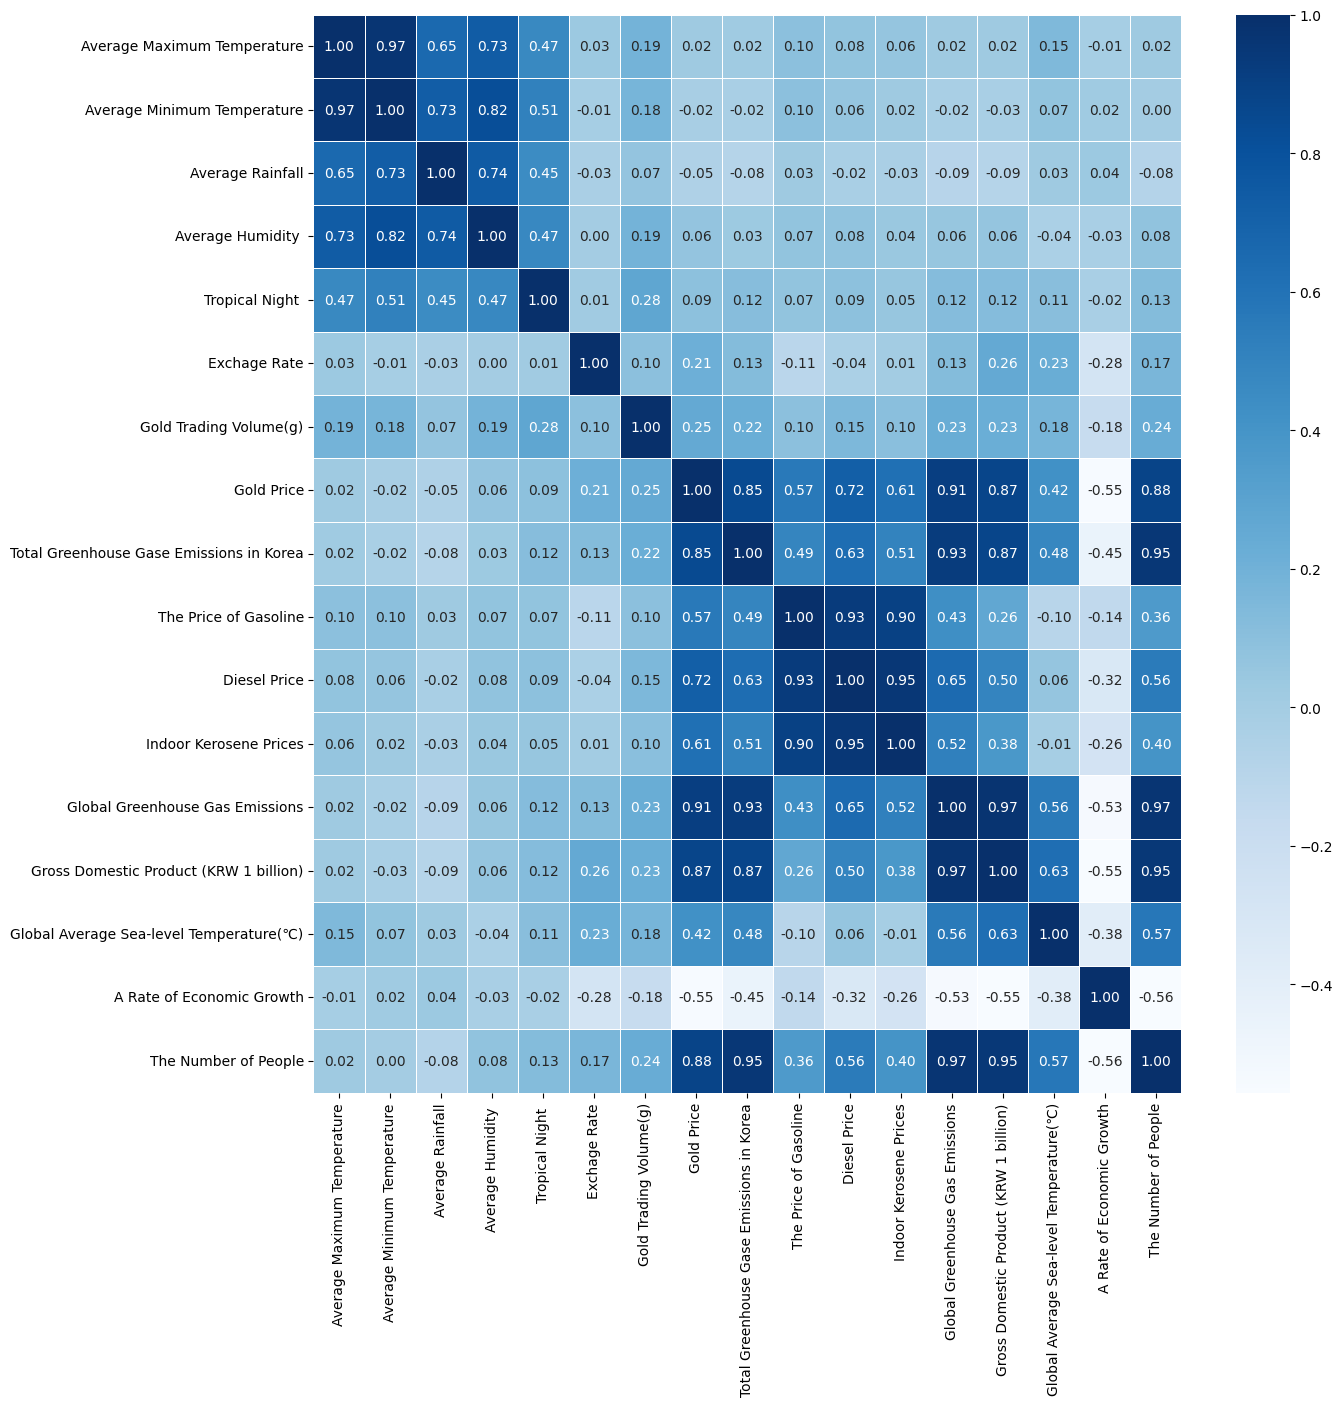

In [ ]:
# correlation coefficient heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr_coefficient, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

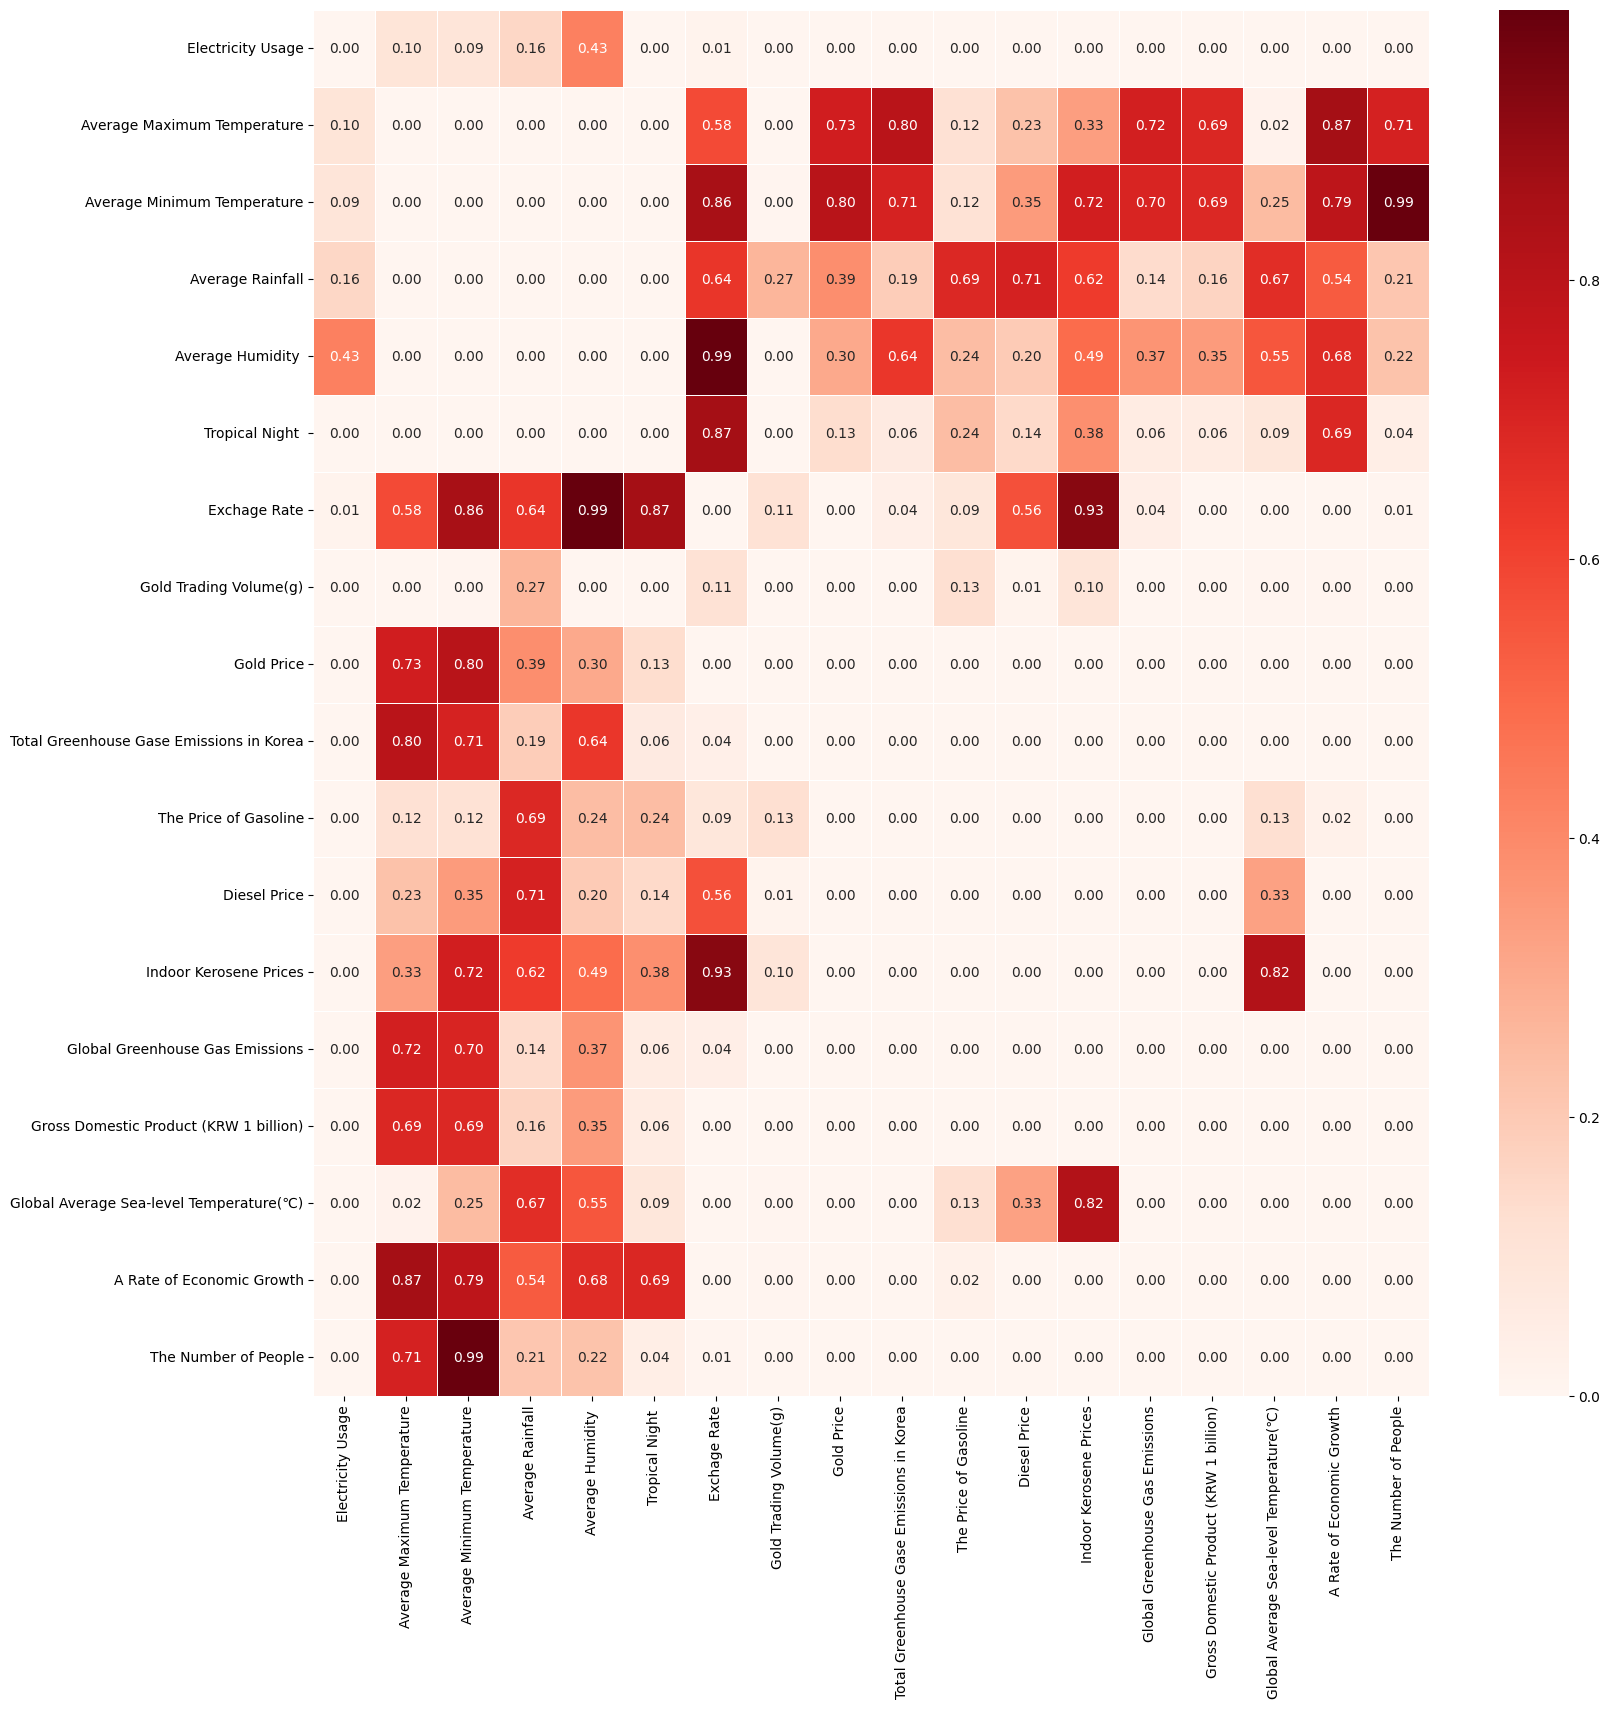

In [ ]:
# correlation P-values heatmap
plt.figure(figsize=(18,18))
sns.heatmap(corr_p_values, annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
plt.show()

# VIF


In [1]:
import pandas as pd
import numpy as np
 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
from google.colab import files
import io

myfile = files.upload()
data = pd.read_csv(io.BytesIO(myfile['data.csv']) )

Saving data.csv to data.csv


In [3]:
data

,Month,Electricity Usage,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
0,2002-01-01,24352.83118,6.0,-2.9,64.0,64,0,1314.4,55330,282.60,538.4580,1227.50,597.91,509.85,34986570.0,784741.3,20.3,7.7,48229948
1,2002-02-01,21099.63500,8.8,-3.1,6.7,56,0,1323.8,525460,283.00,538.4580,1225.43,600.11,509.60,34986570.0,784741.3,20.4,7.7,48229948
2,2002-03-01,23568.18835,14.3,1.8,53.1,56,0,1325.9,29620,303.90,538.4580,1233.62,609.21,512.47,34986570.0,784741.3,20.5,7.7,48229948
3,2002-04-01,22199.24014,19.6,7.2,153.7,58,0,1294.0,452940,304.00,538.4580,1265.08,652.75,536.59,34986570.0,784741.3,20.4,7.7,48229948
4,2002-05-01,22960.52245,22.5,11.7,113.6,67,0,1226.3,74240,314.20,538.4580,1293.46,681.37,548.88,34986570.0,784741.3,20.4,7.7,48229948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022-12-01,52889.45221,3.8,-6.0,15.2,62,0,1264.5,85550,1798.00,682.3210,1563.68,1783.21,1552.55,49564650.0,2150575.8,20.5,2.6,51439038
252,2023-01-01,51651.56160,12.5,-17.3,47.9,63,0,1231.9,1020000,1847.20,739.8397,1562.93,1675.37,1495.25,51226248.8,2206263.0,20.6,1.6,51430018
253,2023-02-01,45739.50828,12.4,-5.3,1.0,59,0,1322.6,111600,1959.70,739.8397,1578.49,1606.41,1464.42,51226248.8,2206263.0,20.8,1.6,51421479
254,2023-03-01,44077.47262,25.1,-1.9,10.5,51,0,1301.9,5220000,1834.00,739.8397,1592.25,1539.72,1426.45,51226248.8,2206263.0,20.9,1.6,51414281


In [4]:
data.columns[1: ]

Index(['Electricity Usage', 'Average Maximum Temperature',
       'Average Minimum Temperature', 'Average Rainfall', 'Average Humidity ',
       'Tropical Night ', 'Exchage Rate', 'Gold Trading Volume(g)',
       'Gold Price', 'Total Greenhouse Gase Emissions in Korea',
       'The Price of Gasoline', 'Diesel Price', 'Indoor Kerosene Prices',
       'Global Greenhouse Gas Emissions',
       'Gross Domestic Product (KRW 1 billion)',
       'Global Average Sea-level Temperature(℃)', 'A Rate of Economic Growth',
       'The Number of People'],
      dtype='object')

In [5]:
# correlation from features
data.corr().loc[data.columns[2:], data.columns[2:]].style.background_gradient().set_precision(2).set_properties(**{'font-size': '11pt'})

<ipython-input-5-9ed2c1fe13ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().loc[data.columns[2:], data.columns[2:]].style.background_gradient().set_precision(2).set_properties(**{'font-size': '11pt'})
<ipython-input-5-9ed2c1fe13ed>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().loc[data.columns[2:], data.columns[2:]].style.background_gradient().set_precision(2).set_properties(**{'font-size': '11pt'})


,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
Average Maximum Temperature,1.00,0.97,0.65,0.73,0.47,0.03,0.19,0.02,0.02,0.10,0.08,0.06,0.02,0.02,0.15,-0.01,0.02
Average Minimum Temperature,0.97,1.00,0.73,0.82,0.51,-0.01,0.18,-0.02,-0.02,0.10,0.06,0.02,-0.02,-0.03,0.07,0.02,0.00
Average Rainfall,0.65,0.73,1.00,0.74,0.45,-0.03,0.07,-0.05,-0.08,0.03,-0.02,-0.03,-0.09,-0.09,0.03,0.04,-0.08
Average Humidity,0.73,0.82,0.74,1.00,0.47,0.00,0.19,0.06,0.03,0.07,0.08,0.04,0.06,0.06,-0.04,-0.03,0.08
Tropical Night,0.47,0.51,0.45,0.47,1.00,0.01,0.28,0.09,0.12,0.07,0.09,0.05,0.12,0.12,0.11,-0.02,0.13
Exchage Rate,0.03,-0.01,-0.03,0.00,0.01,1.00,0.10,0.21,0.13,-0.11,-0.04,0.01,0.13,0.26,0.23,-0.28,0.17
Gold Trading Volume(g),0.19,0.18,0.07,0.19,0.28,0.10,1.00,0.25,0.22,0.10,0.15,0.10,0.23,0.23,0.18,-0.18,0.24
Gold Price,0.02,-0.02,-0.05,0.06,0.09,0.21,0.25,1.00,0.85,0.57,0.72,0.61,0.91,0.87,0.42,-0.55,0.88
Total Greenhouse Gase Emissions in Korea,0.02,-0.02,-0.08,0.03,0.12,0.13,0.22,0.85,1.00,0.49,0.63,0.51,0.93,0.87,0.48,-0.45,0.95
The Price of Gasoline,0.10,0.10,0.03,0.07,0.07,-0.11,0.10,0.57,0.49,1.00,0.93,0.90,0.43,0.26,-0.10,-0.14,0.36


In [6]:
data.values

array([['2002-01-01', 24352.83118, 6.0, ..., 20.3, 7.7, 48229948],
       ['2002-02-01', 21099.635, 8.8, ..., 20.4, 7.7, 48229948],
       ['2002-03-01', 23568.18835, 14.3, ..., 20.5, 7.7, 48229948],
       ...,
       ['2023-02-01', 45739.50828, 12.4, ..., 20.8, 1.6, 51421479],
       ['2023-03-01', 44077.47262, 25.1, ..., 20.9, 1.6, 51414281],
       ['2023-04-01', 40525.50384, 28.4, ..., 21.0, 1.6, 51408155]],
      dtype=object)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Month                                     256 non-null    object 
 1   Electricity Usage                         256 non-null    float64
 2   Average Maximum Temperature               256 non-null    float64
 3   Average Minimum Temperature               256 non-null    float64
 4   Average Rainfall                          256 non-null    float64
 5   Average Humidity                          256 non-null    int64  
 6   Tropical Night                            256 non-null    int64  
 7   Exchage Rate                              256 non-null    float64
 8   Gold Trading Volume(g)                    256 non-null    int64  
 9   Gold Price                                256 non-null    float64
 10  Total Greenhouse Gase Emissions in Kor

In [8]:
data

,Month,Electricity Usage,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
0,2002-01-01,24352.83118,6.0,-2.9,64.0,64,0,1314.4,55330,282.60,538.4580,1227.50,597.91,509.85,34986570.0,784741.3,20.3,7.7,48229948
1,2002-02-01,21099.63500,8.8,-3.1,6.7,56,0,1323.8,525460,283.00,538.4580,1225.43,600.11,509.60,34986570.0,784741.3,20.4,7.7,48229948
2,2002-03-01,23568.18835,14.3,1.8,53.1,56,0,1325.9,29620,303.90,538.4580,1233.62,609.21,512.47,34986570.0,784741.3,20.5,7.7,48229948
3,2002-04-01,22199.24014,19.6,7.2,153.7,58,0,1294.0,452940,304.00,538.4580,1265.08,652.75,536.59,34986570.0,784741.3,20.4,7.7,48229948
4,2002-05-01,22960.52245,22.5,11.7,113.6,67,0,1226.3,74240,314.20,538.4580,1293.46,681.37,548.88,34986570.0,784741.3,20.4,7.7,48229948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022-12-01,52889.45221,3.8,-6.0,15.2,62,0,1264.5,85550,1798.00,682.3210,1563.68,1783.21,1552.55,49564650.0,2150575.8,20.5,2.6,51439038
252,2023-01-01,51651.56160,12.5,-17.3,47.9,63,0,1231.9,1020000,1847.20,739.8397,1562.93,1675.37,1495.25,51226248.8,2206263.0,20.6,1.6,51430018
253,2023-02-01,45739.50828,12.4,-5.3,1.0,59,0,1322.6,111600,1959.70,739.8397,1578.49,1606.41,1464.42,51226248.8,2206263.0,20.8,1.6,51421479
254,2023-03-01,44077.47262,25.1,-1.9,10.5,51,0,1301.9,5220000,1834.00,739.8397,1592.25,1539.72,1426.45,51226248.8,2206263.0,20.9,1.6,51414281


In [9]:

data = data.iloc[:, 2:]
data

,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
0,6.0,-2.9,64.0,64,0,1314.4,55330,282.60,538.4580,1227.50,597.91,509.85,34986570.0,784741.3,20.3,7.7,48229948
1,8.8,-3.1,6.7,56,0,1323.8,525460,283.00,538.4580,1225.43,600.11,509.60,34986570.0,784741.3,20.4,7.7,48229948
2,14.3,1.8,53.1,56,0,1325.9,29620,303.90,538.4580,1233.62,609.21,512.47,34986570.0,784741.3,20.5,7.7,48229948
3,19.6,7.2,153.7,58,0,1294.0,452940,304.00,538.4580,1265.08,652.75,536.59,34986570.0,784741.3,20.4,7.7,48229948
4,22.5,11.7,113.6,67,0,1226.3,74240,314.20,538.4580,1293.46,681.37,548.88,34986570.0,784741.3,20.4,7.7,48229948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,3.8,-6.0,15.2,62,0,1264.5,85550,1798.00,682.3210,1563.68,1783.21,1552.55,49564650.0,2150575.8,20.5,2.6,51439038
252,12.5,-17.3,47.9,63,0,1231.9,1020000,1847.20,739.8397,1562.93,1675.37,1495.25,51226248.8,2206263.0,20.6,1.6,51430018
253,12.4,-5.3,1.0,59,0,1322.6,111600,1959.70,739.8397,1578.49,1606.41,1464.42,51226248.8,2206263.0,20.8,1.6,51421479
254,25.1,-1.9,10.5,51,0,1301.9,5220000,1834.00,739.8397,1592.25,1539.72,1426.45,51226248.8,2206263.0,20.9,1.6,51414281


In [10]:
# extract effective features using variance inflation factor
vif = pd.DataFrame()

# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻

vif['VIF_Factor'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['Feature'] = data.columns
vif.sort_values(by='VIF_Factor', ascending=True)

,VIF_Factor,Feature
4,1.739843,Tropical Night
6,1.803563,Gold Trading Volume(g)
2,6.220880,Average Rainfall
15,8.015389,A Rate of Economic Growth
7,74.720091,Gold Price
1,75.677633,Average Minimum Temperature
0,163.617607,Average Maximum Temperature
5,264.573251,Exchage Rate
11,297.789864,Indoor Kerosene Prices
3,340.385227,Average Humidity


In [11]:
n_data = data.drop(['Global Greenhouse Gas Emissions', 'The Number of People',
                       'Average Minimum Temperature', 
                       'Diesel Price','Gold Price',
                       'Indoor Kerosene Prices'], axis =1)
# extract effective features using variance inflation factor
vif = pd.DataFrame()

# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻

vif['VIF_Factor'] = [variance_inflation_factor(n_data.values, i) for i in range(n_data.shape[1])]
vif['Feature'] = n_data.columns
vif.sort_values(by='VIF_Factor', ascending=True)

,VIF_Factor,Feature
3,1.636496,Tropical Night
5,1.711666,Gold Trading Volume(g)
1,5.012147,Average Rainfall
10,6.926232,A Rate of Economic Growth
0,12.573941,Average Maximum Temperature
8,70.715209,Gross Domestic Product (KRW 1 billion)
7,86.095959,The Price of Gasoline
4,134.990307,Exchage Rate
2,184.212533,Average Humidity
9,582.952008,Global Average Sea-level Temperature(℃)


In [12]:
from sklearn.preprocessing import StandardScaler, Normalizer

# data scaling
scaler = StandardScaler()
scaler.fit(data)
data_sc = scaler.transform(data)
data_sc


array([[-1.40166795, -1.12950644, -0.41838185, ..., -0.98208041,
         2.26558148, -1.76120115],
       [-1.08584876, -1.15023578, -0.93133358, ..., -0.4658328 ,
         2.26558148, -1.76120115],
       [-0.46548964, -0.6423668 , -0.51595905, ...,  0.05041481,
         2.26558148, -1.76120115],
       ...,
       [-0.67979552, -1.37825859, -0.98236019, ...,  1.59915763,
        -1.03842678,  0.75662369],
       [ 0.75267009, -1.02585971, -0.89731583, ...,  2.11540523,
        -1.03842678,  0.75094513],
       [ 1.12488556, -0.50762606, -0.12385983, ...,  2.63165284,
        -1.03842678,  0.74611228]])

In [13]:
type(data_sc)

numpy.ndarray

In [14]:
data_sc = pd.DataFrame(data_sc)

data_sc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.401668,-1.129506,-0.418382,-0.384114,-0.345367,1.749389,-0.644253,-1.729410,-1.699277,-1.634450,-2.325976,-1.912748,-2.078390,-1.581054,-0.982080,2.265581,-1.761201
1,-1.085849,-1.150236,-0.931334,-1.327359,-0.345367,1.838943,-0.307468,-1.728597,-1.699277,-1.643932,-2.319168,-1.913700,-2.078390,-1.581054,-0.465833,2.265581,-1.761201
2,-0.465490,-0.642367,-0.515959,-1.327359,-0.345367,1.858950,-0.662671,-1.686094,-1.699277,-1.606416,-2.291009,-1.902769,-2.078390,-1.581054,0.050415,2.265581,-1.761201
3,0.132311,-0.082674,0.384616,-1.091548,-0.345367,1.555036,-0.359419,-1.685890,-1.699277,-1.462308,-2.156278,-1.810906,-2.078390,-1.581054,-0.465833,2.265581,-1.761201
4,0.459409,0.383736,0.025639,-0.030398,-0.345367,0.910052,-0.630707,-1.665147,-1.699277,-1.332309,-2.067716,-1.764098,-2.078390,-1.581054,-0.465833,2.265581,-1.761201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-1.649812,-1.450811,-0.855241,-0.619925,-0.345367,1.273987,-0.622604,1.352375,0.601647,-0.094521,1.341838,2.058474,1.321535,1.624231,0.050415,-0.496786,0.770476
252,-0.668516,-2.622019,-0.562510,-0.502020,-0.345367,0.963404,0.046804,1.452430,1.521593,-0.097956,1.008136,1.840242,1.709056,1.754915,0.566662,-1.038427,0.763360
253,-0.679796,-1.378259,-0.982360,-0.973642,-0.345367,1.827511,-0.603943,1.681215,1.521593,-0.026681,0.794745,1.722823,1.709056,1.754915,1.599158,-1.038427,0.756624
254,0.752670,-1.025860,-0.897316,-1.916887,-0.345367,1.630300,3.055541,1.425586,1.521593,0.036349,0.588378,1.578211,1.709056,1.754915,2.115405,-1.038427,0.750945


In [15]:
data_sc.columns=[data.columns]
data_sc

,Average Maximum Temperature,Average Minimum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Gold Price,Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Diesel Price,Indoor Kerosene Prices,Global Greenhouse Gas Emissions,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,The Number of People
0,-1.401668,-1.129506,-0.418382,-0.384114,-0.345367,1.749389,-0.644253,-1.729410,-1.699277,-1.634450,-2.325976,-1.912748,-2.078390,-1.581054,-0.982080,2.265581,-1.761201
1,-1.085849,-1.150236,-0.931334,-1.327359,-0.345367,1.838943,-0.307468,-1.728597,-1.699277,-1.643932,-2.319168,-1.913700,-2.078390,-1.581054,-0.465833,2.265581,-1.761201
2,-0.465490,-0.642367,-0.515959,-1.327359,-0.345367,1.858950,-0.662671,-1.686094,-1.699277,-1.606416,-2.291009,-1.902769,-2.078390,-1.581054,0.050415,2.265581,-1.761201
3,0.132311,-0.082674,0.384616,-1.091548,-0.345367,1.555036,-0.359419,-1.685890,-1.699277,-1.462308,-2.156278,-1.810906,-2.078390,-1.581054,-0.465833,2.265581,-1.761201
4,0.459409,0.383736,0.025639,-0.030398,-0.345367,0.910052,-0.630707,-1.665147,-1.699277,-1.332309,-2.067716,-1.764098,-2.078390,-1.581054,-0.465833,2.265581,-1.761201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-1.649812,-1.450811,-0.855241,-0.619925,-0.345367,1.273987,-0.622604,1.352375,0.601647,-0.094521,1.341838,2.058474,1.321535,1.624231,0.050415,-0.496786,0.770476
252,-0.668516,-2.622019,-0.562510,-0.502020,-0.345367,0.963404,0.046804,1.452430,1.521593,-0.097956,1.008136,1.840242,1.709056,1.754915,0.566662,-1.038427,0.763360
253,-0.679796,-1.378259,-0.982360,-0.973642,-0.345367,1.827511,-0.603943,1.681215,1.521593,-0.026681,0.794745,1.722823,1.709056,1.754915,1.599158,-1.038427,0.756624
254,0.752670,-1.025860,-0.897316,-1.916887,-0.345367,1.630300,3.055541,1.425586,1.521593,0.036349,0.588378,1.578211,1.709056,1.754915,2.115405,-1.038427,0.750945


In [16]:
# extract effective features using variance inflation factor
vif = pd.DataFrame()

# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻

vif['VIF_Factor'] = [variance_inflation_factor(data_sc, i) for i in range(data_sc.shape[1])]
vif['Feature'] = data_sc.columns
vif.sort_values(by='VIF_Factor', ascending=True)

,VIF_Factor,Feature
6,1.228982,"(Gold Trading Volume(g),)"
4,1.573901,"(Tropical Night ,)"
15,1.983701,"(A Rate of Economic Growth,)"
5,2.304108,"(Exchage Rate,)"
14,2.746046,"(Global Average Sea-level Temperature(℃),)"
2,3.205952,"(Average Rainfall,)"
3,5.597944,"(Average Humidity ,)"
7,12.534037,"(Gold Price,)"
11,21.418867,"(Indoor Kerosene Prices,)"
9,21.679637,"(The Price of Gasoline,)"


In [25]:
n_data = data_sc.drop(['Global Greenhouse Gas Emissions', 
                       'The Number of People',
                       'Average Minimum Temperature', 
                       'Diesel Price', 'Gold Price',
                       'Indoor Kerosene Prices'
                       ], axis =1)
# extract effective features using variance inflation factor
vif = pd.DataFrame()

# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻

vif['VIF_Factor'] = [variance_inflation_factor(n_data.values, i) for i in range(n_data.shape[1])]
vif['Feature'] = n_data.columns
vif.sort_values(by='VIF_Factor', ascending=True)


<ipython-input-25-e022422f5a23>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  n_data = data_sc.drop(['Global Greenhouse Gas Emissions',


,VIF_Factor,Feature
4,1.165285,"(Exchage Rate,)"
5,1.174882,"(Gold Trading Volume(g),)"
3,1.462102,"(Tropical Night ,)"
10,1.505335,"(A Rate of Economic Growth,)"
7,1.808020,"(The Price of Gasoline,)"
9,2.402671,"(Global Average Sea-level Temperature(℃),)"
1,2.702604,"(Average Rainfall,)"
0,2.753566,"(Average Maximum Temperature,)"
2,3.749986,"(Average Humidity ,)"
6,6.290408,"(Total Greenhouse Gase Emissions in Korea,)"


In [18]:
n_data

,Average Maximum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth
0,-1.401668,-0.418382,-0.384114,-0.345367,1.749389,-0.644253,-1.699277,-1.634450,-1.581054,-0.982080,2.265581
1,-1.085849,-0.931334,-1.327359,-0.345367,1.838943,-0.307468,-1.699277,-1.643932,-1.581054,-0.465833,2.265581
2,-0.465490,-0.515959,-1.327359,-0.345367,1.858950,-0.662671,-1.699277,-1.606416,-1.581054,0.050415,2.265581
3,0.132311,0.384616,-1.091548,-0.345367,1.555036,-0.359419,-1.699277,-1.462308,-1.581054,-0.465833,2.265581
4,0.459409,0.025639,-0.030398,-0.345367,0.910052,-0.630707,-1.699277,-1.332309,-1.581054,-0.465833,2.265581
...,...,...,...,...,...,...,...,...,...,...,...
251,-1.649812,-0.855241,-0.619925,-0.345367,1.273987,-0.622604,0.601647,-0.094521,1.624231,0.050415,-0.496786
252,-0.668516,-0.562510,-0.502020,-0.345367,0.963404,0.046804,1.521593,-0.097956,1.754915,0.566662,-1.038427
253,-0.679796,-0.982360,-0.973642,-0.345367,1.827511,-0.603943,1.521593,-0.026681,1.754915,1.599158,-1.038427
254,0.752670,-0.897316,-1.916887,-0.345367,1.630300,3.055541,1.521593,0.036349,1.754915,2.115405,-1.038427


In [19]:
feature_list = list(n_data.columns[:])
features=n_data.iloc[:, :]

# correlation coefficient dataframe
corr_coefficient=pd.DataFrame(np.zeros((11,11)))
corr_coefficient.columns = feature_list
corr_coefficient.index = feature_list

corr_c(corr_coefficient)

NameError: ignored

In [ ]:
# correlation coefficient heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr_coefficient, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()